# Apprentissage Supervisé avec Sklearn

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.simplefilter('ignore')

## 1. Régression

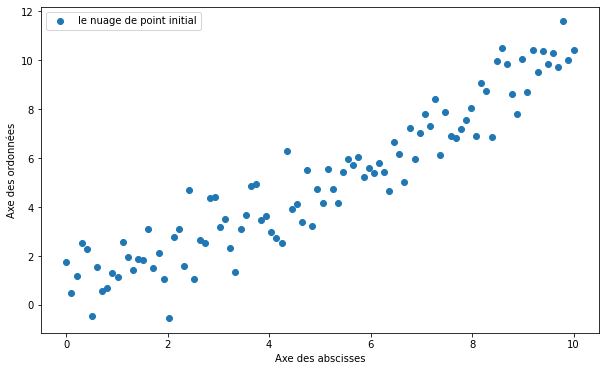

In [47]:
np.random.seed(0) #graine d'initiation des nombres aléatoires
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1)
y = X + np.random.randn(m, 1)

plt.figure(figsize=(10,6))
plt.scatter(X, y,label='le nuage de point initial')
plt.xlabel('Axe des abscisses')
plt.ylabel('Axe des ordonnées')
plt.legend()

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression() #on parle d'estimateur et on précise alors ses hyperparamètres
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation du modèle avec le coefficient de corrélation

0.8881140743377214

In [55]:
model.intercept_

array([0.20847145])

In [56]:
model.coef_

array([[0.97026731]])

In [57]:
predictions=model.predict(X) 
#on prédit les valeurs grâce à l'estimateur, donc des points de la droite de régression

In [61]:
model.predict([[12]])

array([[11.85167921]])

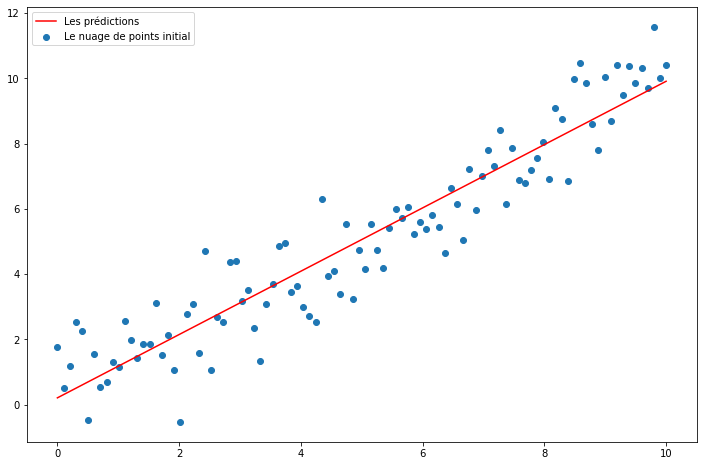

In [58]:
plt.figure(figsize=(12,8))
plt.scatter(X, y,label='Le nuage de points initial')
plt.plot(X,predictions,c='r',label='Les prédictions')
plt.legend()

In [62]:
model.get_params(True)
model.set_params()

LinearRegression()

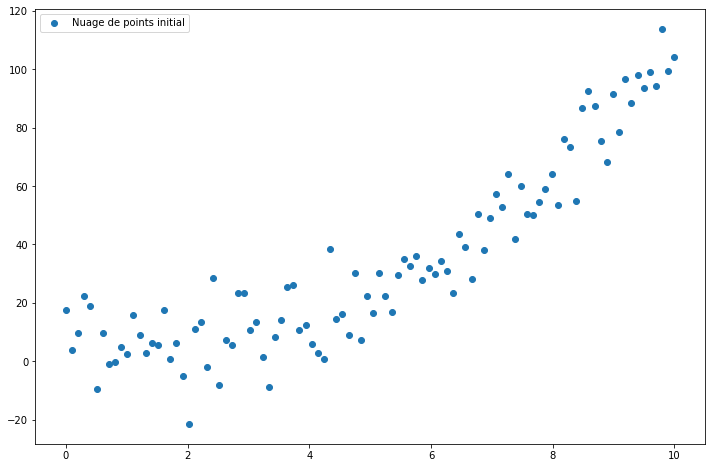

In [65]:
np.random.seed(0)
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1)
y = X**2 + 10*np.random.randn(m,1)


plt.figure(figsize=(12,8))
plt.scatter(X, y,label='Nuage de points initial')
plt.legend()

In [66]:
model = LinearRegression() #on parle d'estimateur et on précise alors ses hyperparamètres
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation avec le coefficient de corrélation

0.7855276854537206

In [67]:
predictions=model.predict(X)

In [69]:
model.predict([[12]])

array([[102.0184756]])

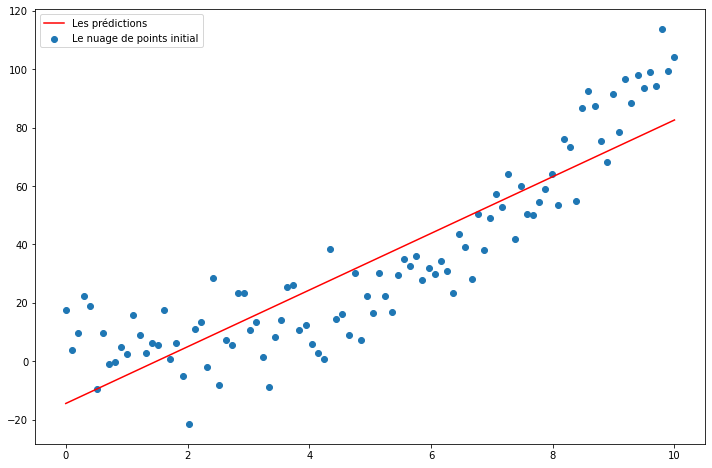

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(X, y,label='Le nuage de points initial')
plt.plot(X,predictions,c='r',label='Les prédictions')
plt.legend()

In [75]:
 from sklearn.svm import SVR #modèle de Support Vector Machine
 model2=SVR(C=100,degree=3)
 model2.fit(X,y)
 model2.score(X,y)

0.916152384089585

In [77]:
model2.predict([[12]])

array([84.27350677])

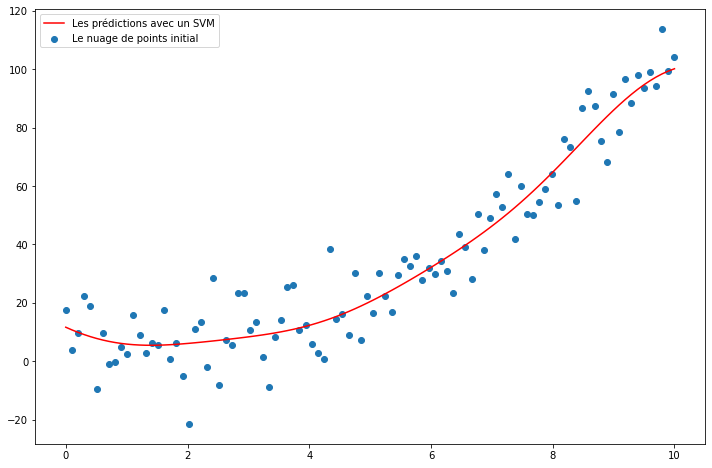

In [76]:
plt.figure(figsize=(12,8))
plt.scatter(X, y,label='Le nuage de points initial')
plt.plot(X,model2.predict(X),c='r',label='Les prédictions avec un SVM')
plt.legend()

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [78]:
mean_squared_error(X,model2.predict(X),squared=False)

40.040678279211996

In [79]:
mean_absolute_error(X,model2.predict(X))

28.91899820058291

In [80]:
mean_squared_error(X,model.predict(X),squared=False)

38.609379235035014

In [81]:
mean_absolute_error(X,model.predict(X))

31.609350876292865

## 2. Classification

In [83]:
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head(20)

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
6,0,1,0,54.0
7,0,3,0,2.0
8,1,3,1,27.0
9,1,2,1,14.0
10,1,3,1,4.0


### a -  une bibliothèque intéressante pour représenter les données pandas : Pandas Profiling

Pour son installation, dans un terminal : 

1 - installer les notebook extensions de Jupyter : conda install -c conda-forge jupyter_nbextenions_configurator

2 - installer la bilbiothèque : conda install -c conda-forge pandas-profiling

3 - activer l'extension : jupyter nbextenion enable --py widgetsnbextension

In [84]:
from pandas_profiling import ProfileReport

In [85]:
profile = profile = ProfileReport(titanic, title="Pandas Profiling Report", explorative=True)


In [86]:
profile.to_notebook_iframe()



Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [87]:
from sklearn.neighbors import KNeighborsClassifier #K plus proche voisin

In [106]:
model3 = KNeighborsClassifier(n_neighbors=3) 
#essayez avec d'autres valeur de n_neighbors qui est un hyperparamètre

In [107]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [108]:
model3.fit(X, y) # entrainement du modele
model3.score(X, y) # évaluation

0.8725490196078431

### b. Prediction de survie

In [118]:
def survie(model, pclass=1, sex=1, age=56):
  x = np.array([pclass, sex, age]).reshape(1, 3)
  print(model.predict(x))
  print(model.predict_proba(x)) #cette fonction n'existe pas pour tout les estimateurs attention

In [119]:
survie(model3)

[1]
[[0.33333333 0.66666667]]


In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
print(confusion_matrix(y,model3.predict(X)))

[[399  25]
 [ 66 224]]


In [122]:
(375+219)/(375+49+71+219)

0.8319327731092437

## 3. Exercice pour plus tard
Écrire un code qui permet de trouver la meilleure valeur de voisin n_neighbors pour le modele de KNeighborsClassifier.

Dans sklearn, il est possible de faire cela avec la classe GridSearchCV. Mais il peut également etre utile de savoir écrire soi-meme ce genre de code de recherche.

3


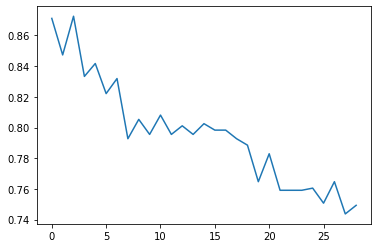

In [30]:
# SOLUTION
score = []
best_k = 1
best_score = 0

for k in range(best_k, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    score.append(model.score(X, y))
    
    if best_score < model.score(X, y):
        best_k = k
        best_score = model.score(X, y)

print(best_k)
plt.plot(score)